In [6]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import get_rules, dt_feature_importance
from tasks.cluster_example import make_task
from sklearn.model_selection import train_test_split

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

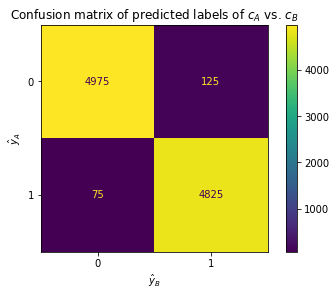

In [4]:
comparer.plot_confusion_matrix(X)

# Global explanations

## $(0,1)$

In [5]:
focus_class = '(0, 1)'

In [8]:
%%time
X_sample, _ = train_test_split(X, train_size=0.1, random_state=0)
explanation = generate_diro2c_explanation(X_sample, 0, comparer, generation_func='global',
                                          focus_class=focus_class, gn_population_size=200)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 59.4 s, sys: 385 ms, total: 59.8 s
Wall time: 1min


In [9]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [10]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [16]:
tree = DecisionTreeClassifier()
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [17]:
feature_importances = dt_feature_importance(tree)
feature_order = np.flip(np.argsort(feature_importances))

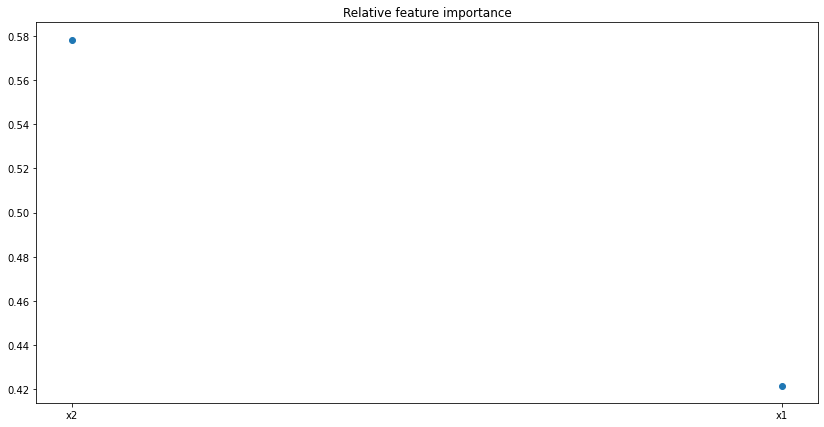

In [18]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

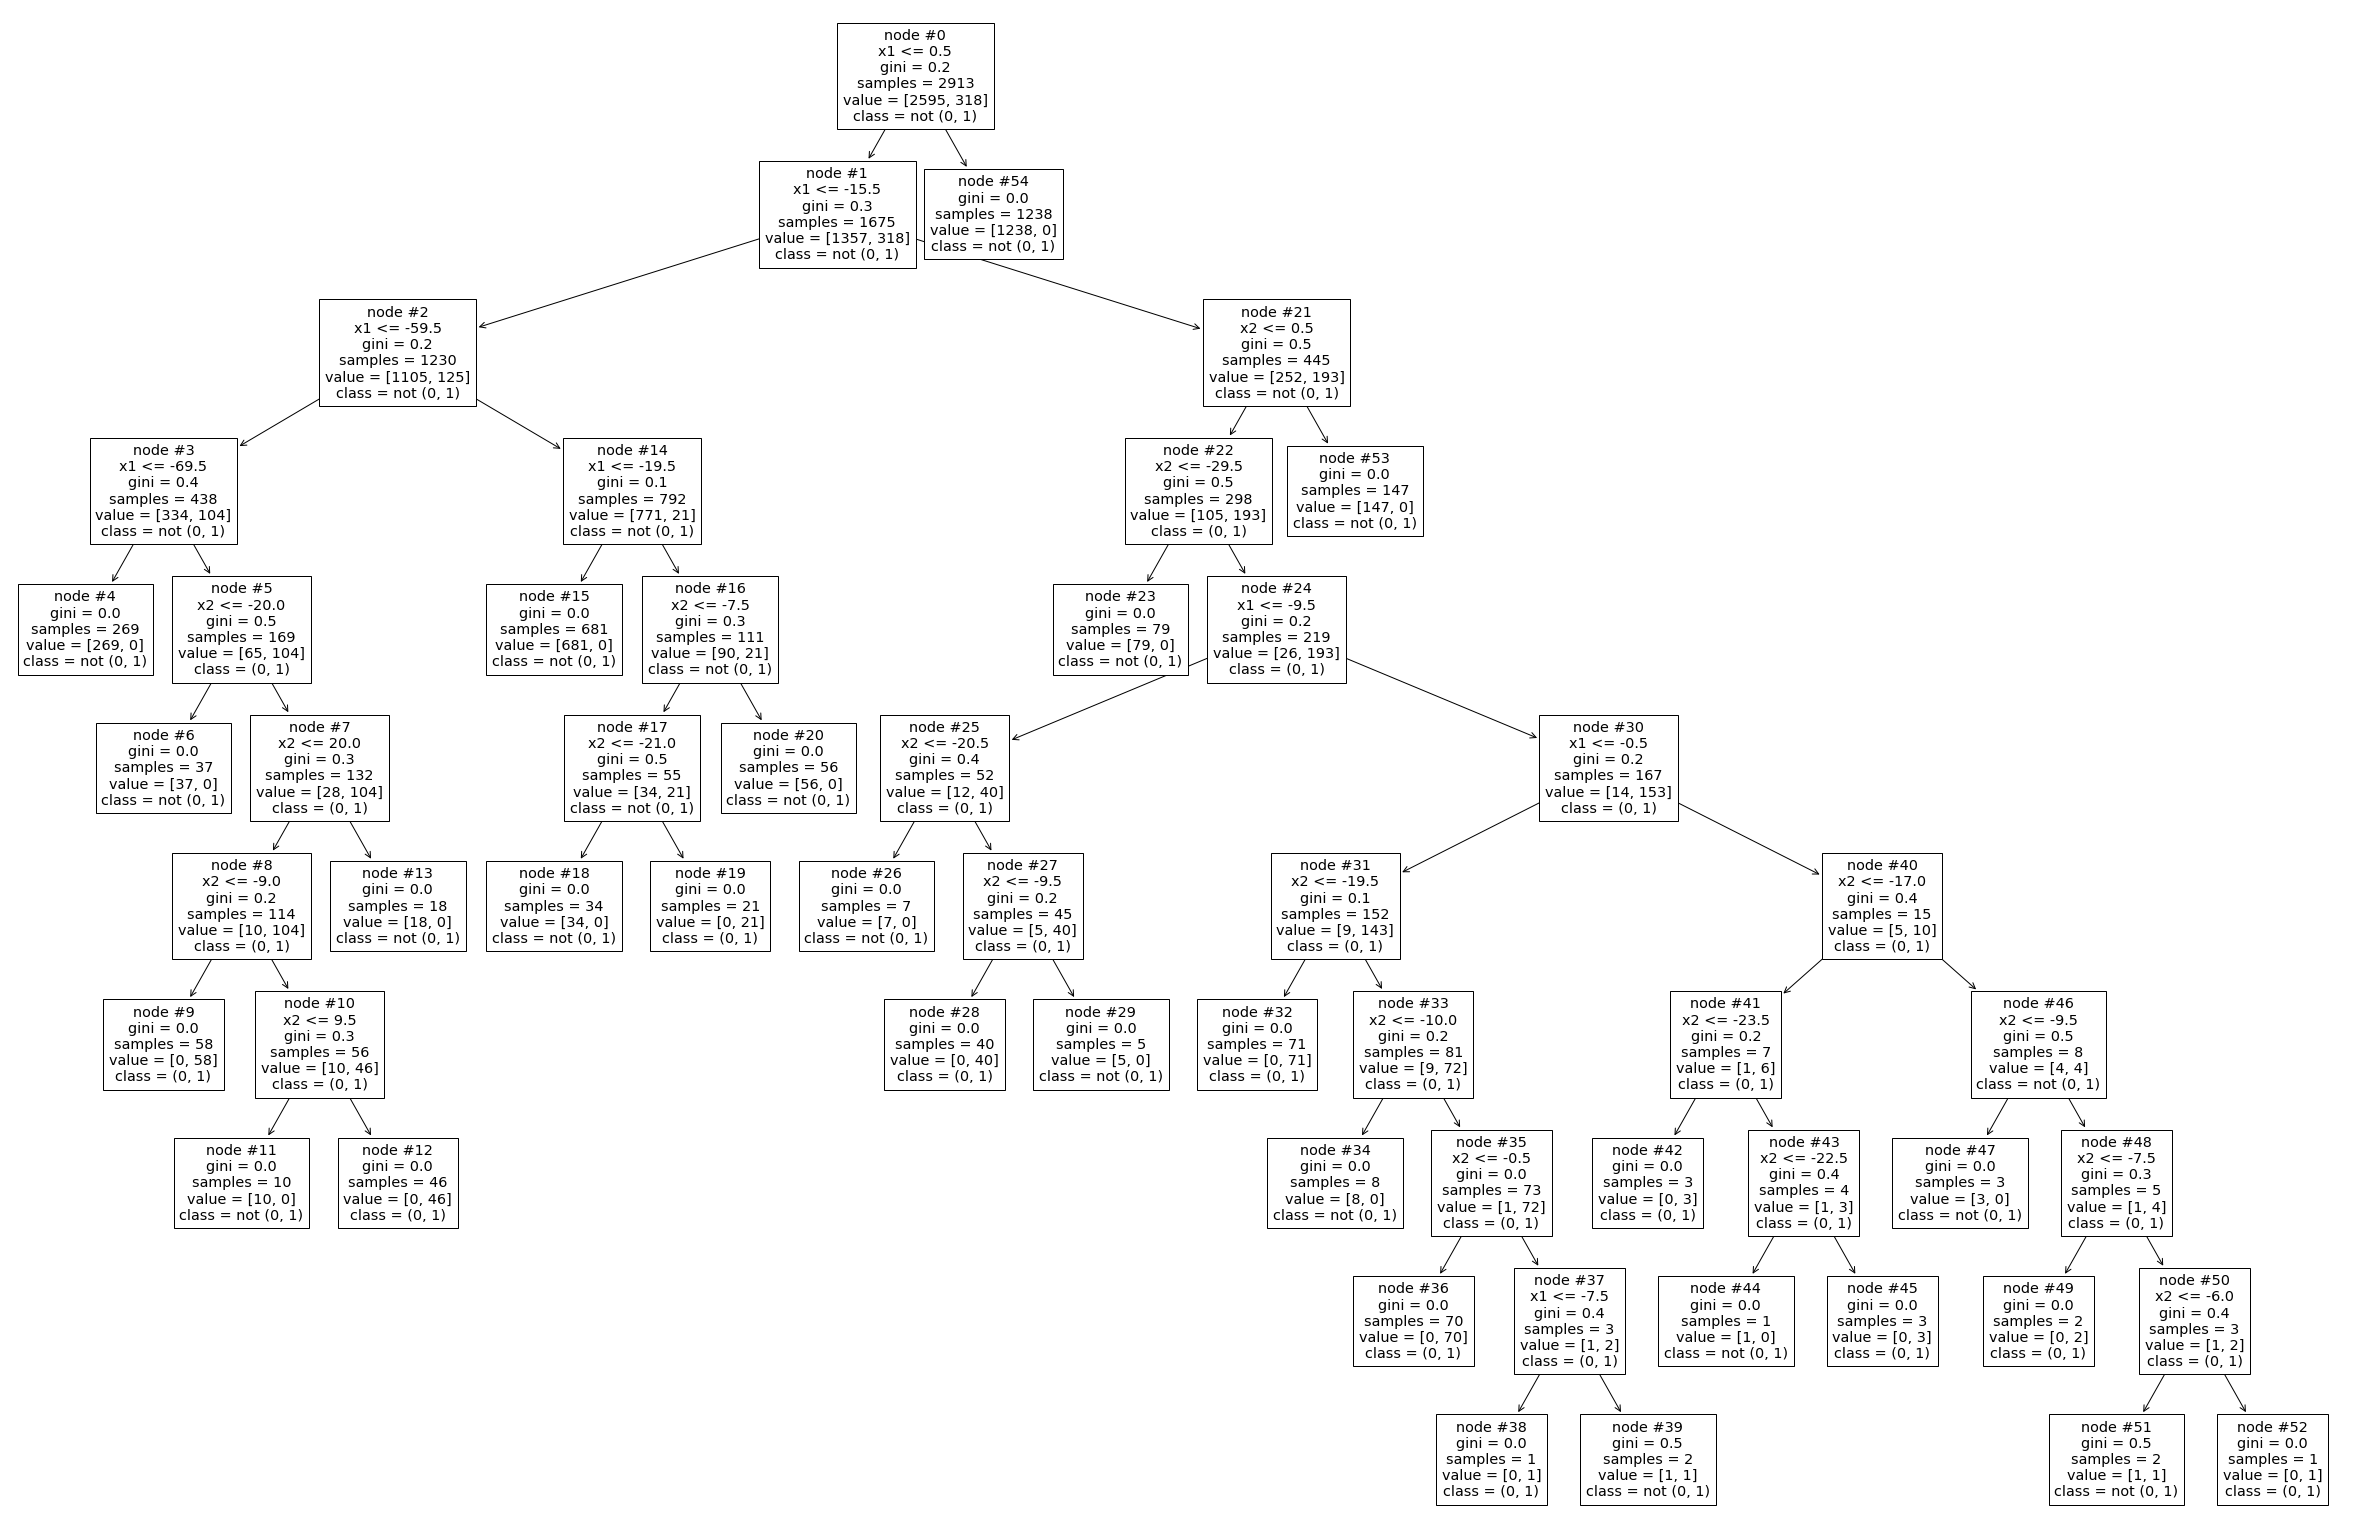

In [19]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [20]:
rules = get_rules(tree, feature_names, class_names, focus_class, feature_order)
[print(rule) for rule in rules];

node #32: if (x2 > -29.5) and (x2 <= -19.5) and (x1 > -9.5) and (x1 <= -0.5) then class: (0, 1) (71/71 instances)
node #36: if (x2 > -10.0) and (x2 <= -0.5) and (x1 > -9.5) and (x1 <= -0.5) then class: (0, 1) (70/70 instances)
node #9: if (x2 > -20.0) and (x2 <= -9.0) and (x1 > -69.5) and (x1 <= -59.5) then class: (0, 1) (58/58 instances)
node #12: if (x2 > 9.5) and (x2 <= 20.0) and (x1 > -69.5) and (x1 <= -59.5) then class: (0, 1) (46/46 instances)
node #28: if (x2 > -20.5) and (x2 <= -9.5) and (x1 > -15.5) and (x1 <= -9.5) then class: (0, 1) (40/40 instances)
node #19: if (x2 > -21.0) and (x2 <= -7.5) and (x1 > -19.5) and (x1 <= -15.5) then class: (0, 1) (21/21 instances)
node #42: if (x2 > -29.5) and (x2 <= -23.5) and (x1 > -0.5) and (x1 <= 0.5) then class: (0, 1) (3/3 instances)
node #45: if (x2 > -22.5) and (x2 <= -17.0) and (x1 > -0.5) and (x1 <= 0.5) then class: (0, 1) (3/3 instances)
node #49: if (x2 > -9.5) and (x2 <= -7.5) and (x1 > -0.5) and (x1 <= 0.5) then class: (0, 1) (2

In [21]:
pd.Series(class_names[y_explain]).value_counts()

not (0, 1)    2595
(0, 1)         318
dtype: int64

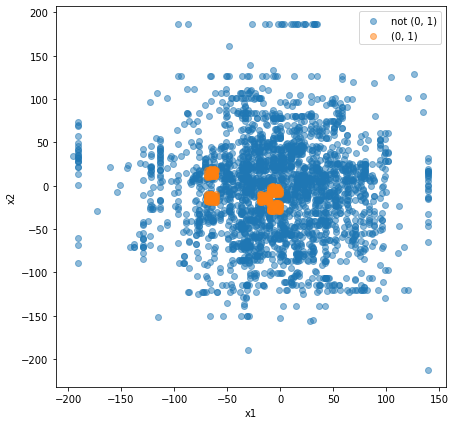

In [23]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## $(1,0)$

In [24]:
focus_class = '(1, 0)'

In [25]:
%%time
X_sample, _ = train_test_split(X, train_size=0.1, random_state=0)
explanation = generate_diro2c_explanation(X_sample, 0, comparer, generation_func='global',
                                          focus_class=focus_class, gn_population_size=200)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 1min, sys: 423 ms, total: 1min
Wall time: 1min 1s


In [26]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [27]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [29]:
feature_importances = dt_feature_importance(tree)
feature_order = np.flip(np.argsort(feature_importances))

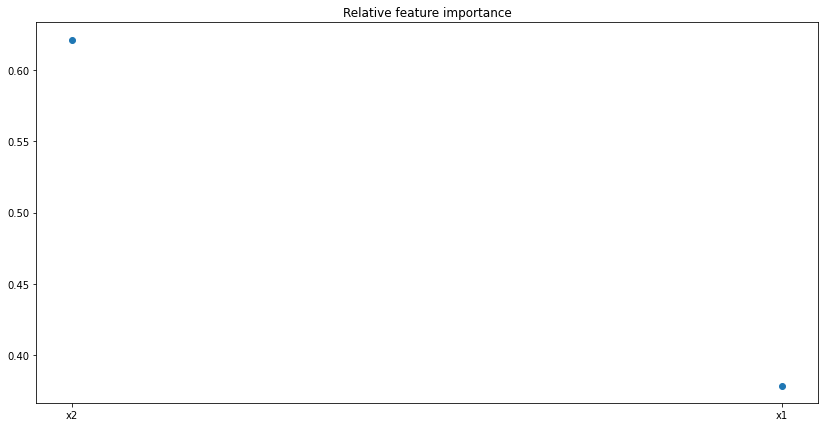

In [30]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

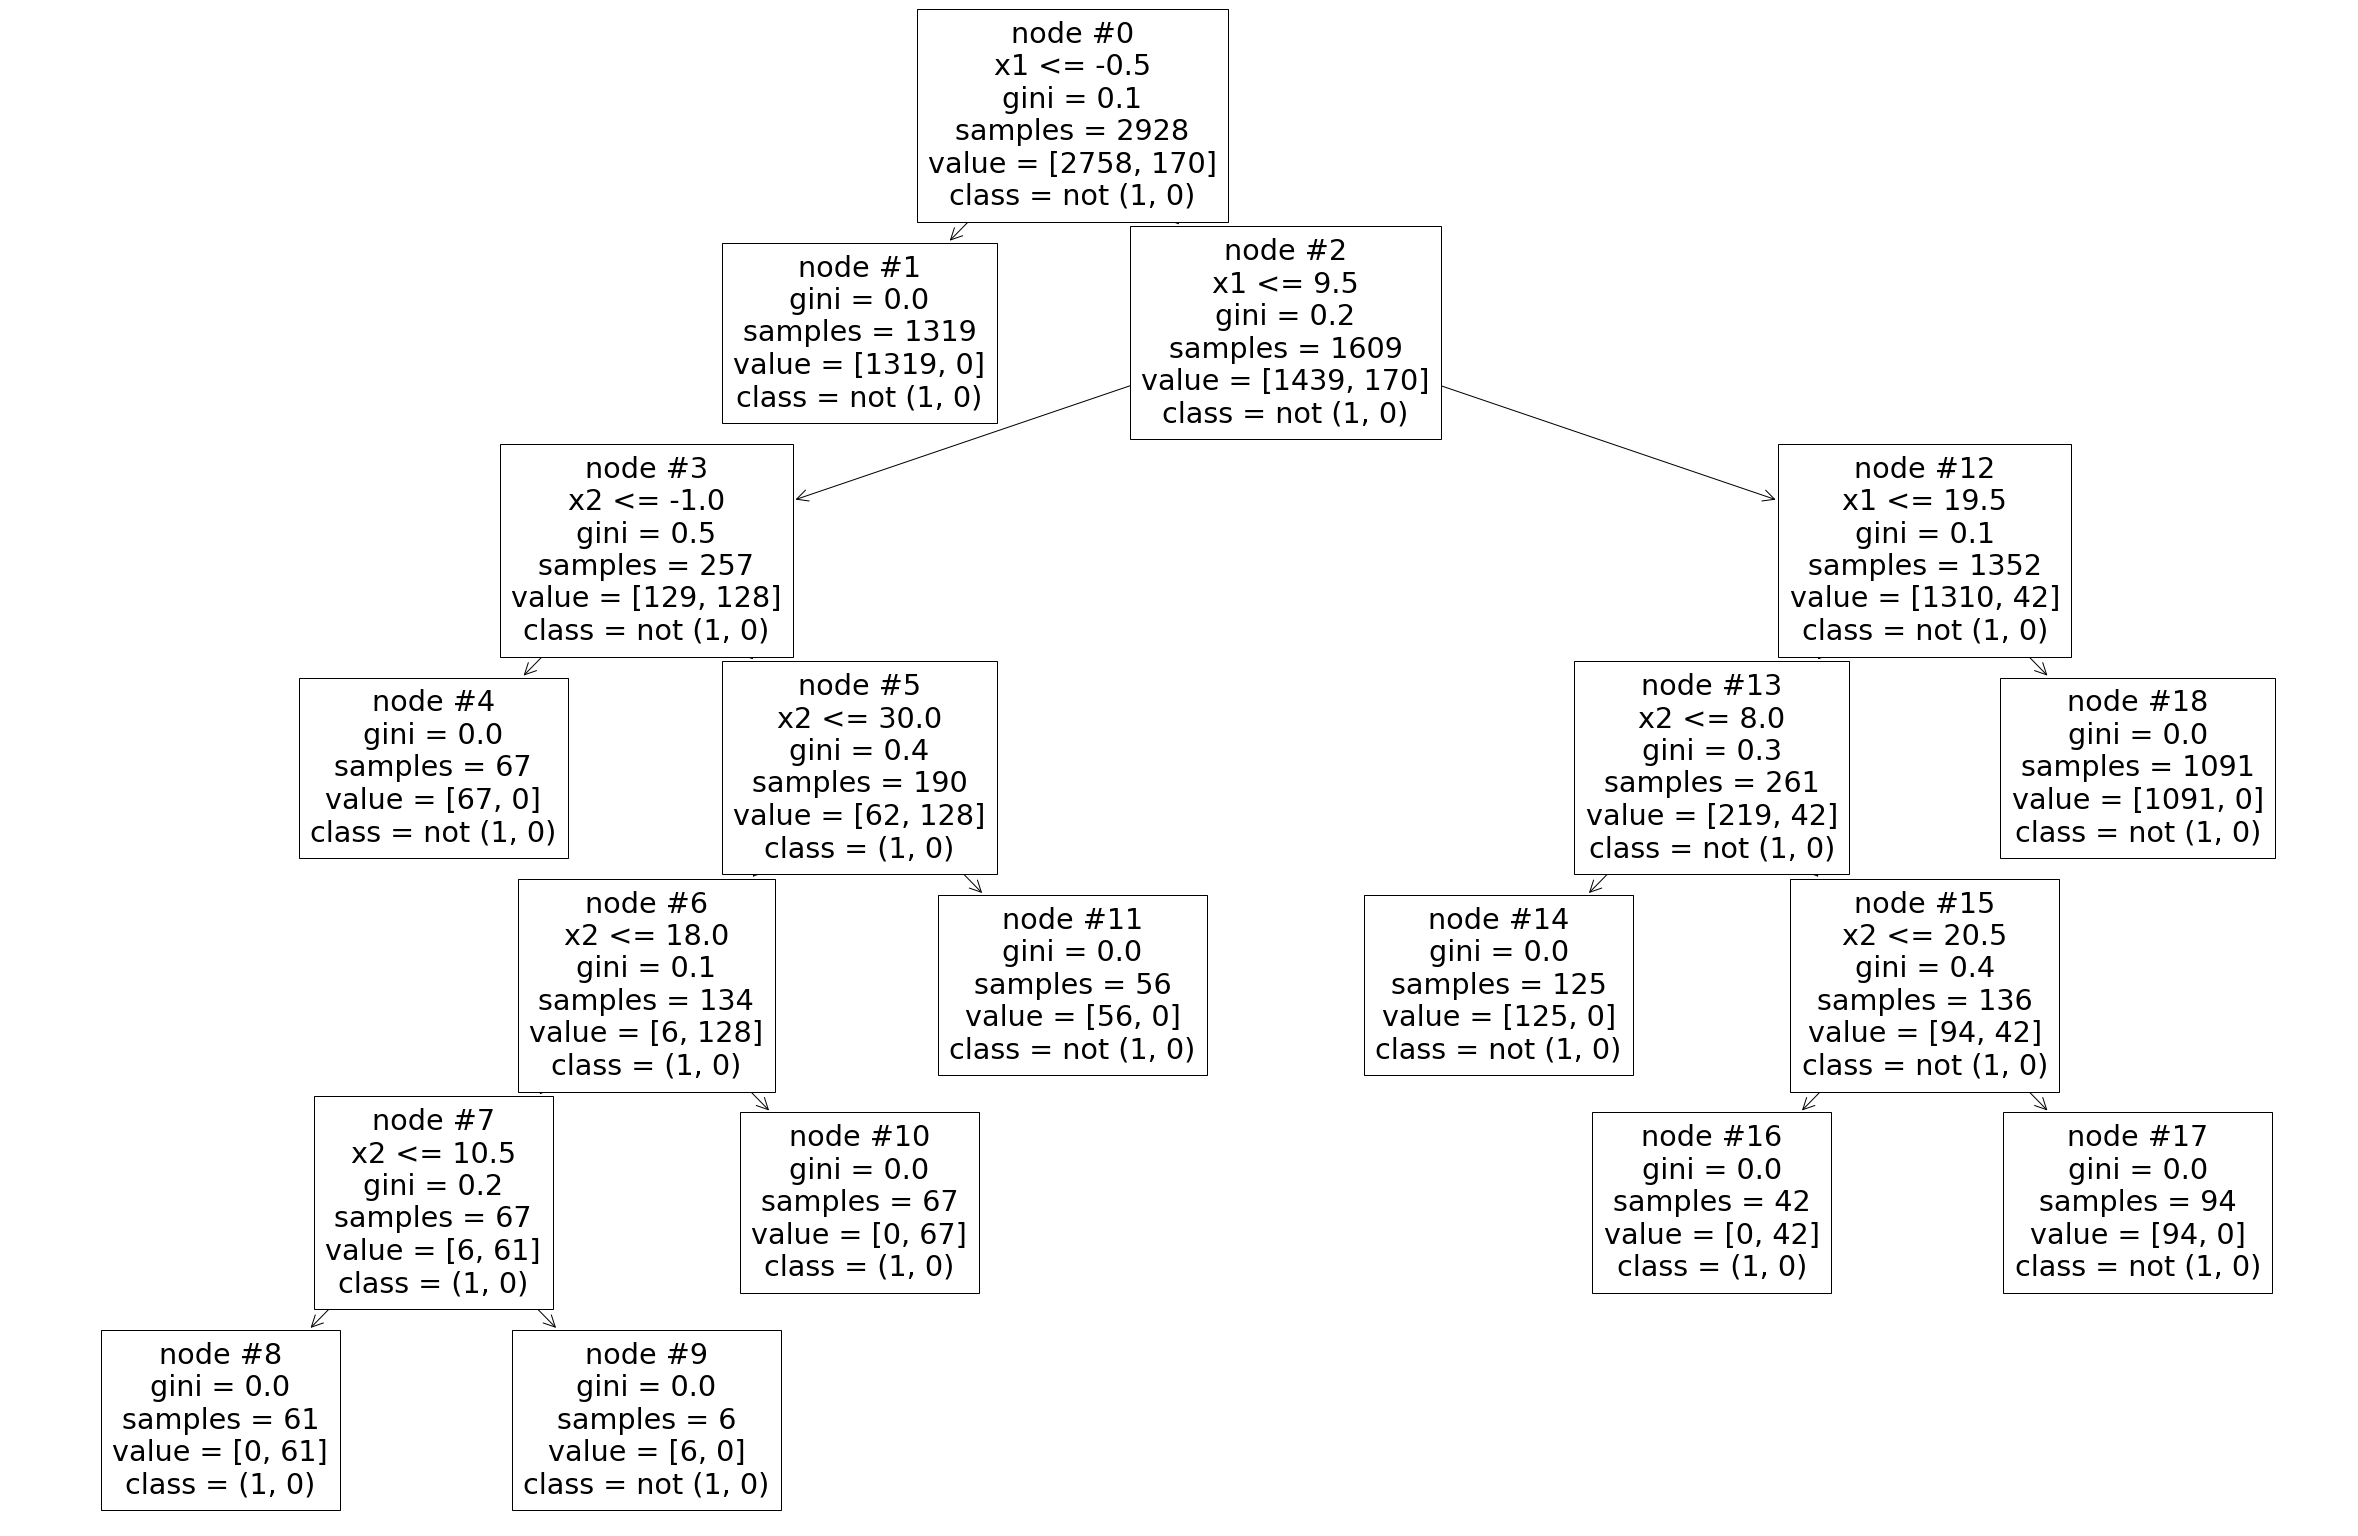

In [31]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [32]:
rules = get_rules(tree, feature_names, class_names, focus_class, feature_order)
[print(rule) for rule in rules];

node #10: if (x2 > 18.0) and (x2 <= 30.0) and (x1 > -0.5) and (x1 <= 9.5) then class: (1, 0) (67/67 instances)
node #8: if (x2 > -1.0) and (x2 <= 10.5) and (x1 > -0.5) and (x1 <= 9.5) then class: (1, 0) (61/61 instances)
node #16: if (x2 > 8.0) and (x2 <= 20.5) and (x1 > 9.5) and (x1 <= 19.5) then class: (1, 0) (42/42 instances)


In [33]:
pd.Series(class_names[y_explain]).value_counts()

not (1, 0)    2758
(1, 0)         170
dtype: int64

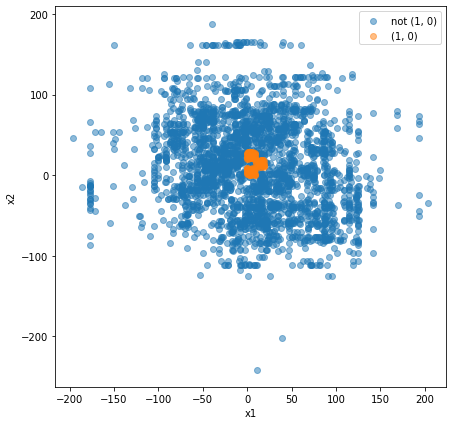

In [34]:
plot_diro2c_2d(explanation, 'x1', 'x2')